**Decision Trees**
This is the final file for decision trees to predict areas of High Crime. The preprocessing file will provide the x_train and x_test. X_train will be used for the hyper-paramater tuning using K-Fold validation. Then the x_test will provide the final accuracy ouput. 

This is support to the main essay, which is provided in the PDF. To see the maths and theory behind the process, please read. 

In [1]:
%run Preprocessing.ipynb

(1549, 100)
(665, 100)


In [5]:
# Import packages
import sklearn.feature_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV # RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score


In [3]:
x_train = x_train #use for hyperparameter tuning
y_train = y_train #use for hyperparameter tuning
x_test = x_test #final valication with the kfold
y_test = y_test #final valication with the kfold

**Build Decision tree #1**

Firstly, we create a basic DecisionTreeClassifier, and then will slowly tune the parameters, firstly, we need to look at the **max depth**. The cell below will calcaulate the accuracy score for a max depth up to *n*. This is then plotted in a bar graph.

For each parameter, we need to create a k-means loop, that then plots the overall figure. 


**Criterion**

In [7]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(tree.DecisionTreeClassifier(criterion='entropy'), x_train, y_train, cv= kf, scoring="accuracy")
print(score.mean())

kf =KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(tree.DecisionTreeClassifier(criterion='gini'), x_train, y_train, cv= kf, scoring="accuracy")
print(score.mean())

0.805033928385009
0.8108466436997599


**Max Depth**

(0.8, 0.86)

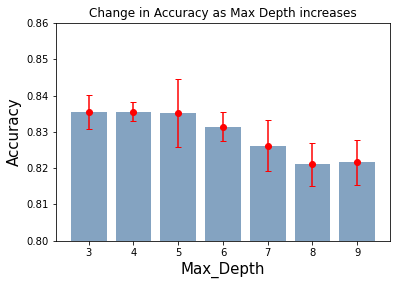

In [9]:
def get_max_depth(n):
    scores ={}
    x = list()
    y = list()
    error = list()
    
    for i in range(3,n): #first create a for loop for each max depth
        value_of_j = [] #this will take the average score for each value of k
        
        for j in range(2,10): #create a for loop for each kfold
            kf =KFold(n_splits=j, shuffle=True, random_state=42)
            score = cross_val_score(tree.DecisionTreeClassifier(criterion='gini', max_depth=i), x_train, y_train, cv= kf, scoring="accuracy")
            value_of_j.append(score.mean())
            
        res = {str(i): value_of_j}
        scores.update(res) # for each max_depth, the average k_fold score
  
    return scores
            
d_max_depth = get_max_depth(10)

import numpy as np
import statistics 
x =[]
y =[]
error = []
for key, value in d_max_depth.items():
    x.append(key)
    y.append(sum(value)/len(value))
    error.append(statistics.stdev(value))
    
xfit = np.linspace(0, 10, 1000)
# plt.plot(x, error, 'or')
plt.bar(x, y, color=(0.2, 0.4, 0.6, 0.6))
plt.errorbar(x, y, yerr = error, barsabove = False, fmt='o', capsize=3, color='red')
#plt.errorbar(x, y, yerr = error, ls='-.', fmt='o', capsize=3)
plt.xlabel('Max_Depth', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Change in Accuracy as Max Depth increases')
plt.ylim(0.8, 0.86)

For this dataset, we have shown that the max_depth at 4 provides the highest accuracy with the lowest error.

In [10]:
from sklearn.metrics import roc_curve, auc
scores ={}
x = list()
y = list()
error = list()

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

for i in min_samples_splits: #first create a for loop for each max depth
    value_of_j = [] #this will take the average score for each value of k

    for j in range(2,10): #create a for loop for each kfold
        kf =KFold(n_splits=j, shuffle=True, random_state=42)
        score = cross_val_score(tree.DecisionTreeClassifier(criterion='gini', splitter = 'best', max_depth=4, min_samples_split = i), x_train, y_train, cv= kf, scoring="accuracy")
        value_of_j.append(score.mean())

    res = {str(i): value_of_j}
    scores.update(res) # for each max_depth, the average k_fold score

get_min_sample_split = scores



(0.0, 1.1)

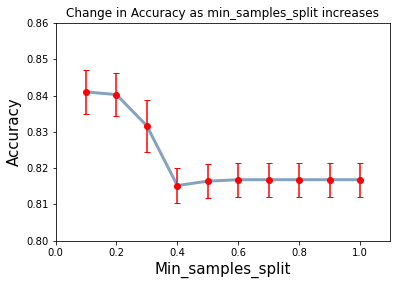

In [11]:
import numpy as np
import statistics 
x =[]
y =[]
error = []
for key, value in get_min_sample_split.items():
    x.append(key)
    y.append(sum(value)/len(value))
    error.append(statistics.stdev(value))
    
x = [round(float(i),2) for i in x]
    
# plt.plot(x, error, 'or')
plt.plot(x, y, color=(0.2, 0.4, 0.6, 0.6), lw=3)
plt.errorbar(x, y, yerr = error, barsabove = False, fmt='o', capsize=3, color='red')
#plt.errorbar(x, y, yerr = error, ls='-.', fmt='o', capsize=3)
plt.xlabel('Min_samples_split', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Change in Accuracy as min_samples_split increases')
plt.ylim(0.8, 0.86)
plt.xlim(0,1.1)

In [12]:
dtree = DecisionTreeClassifier(criterion='gini', splitter = 'best', max_depth=6, min_samples_split =0.1)
dtree = dtree.fit(x_train, y_train)
#tree.plot_tree(dtree, feature_names=data.columns) 

# model can then be used to predict !
# crime_predict = dtree.predict([[0,1]])

y_pred = dtree.predict(x_test)  # Predict the response for test dataset
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8406015037593985


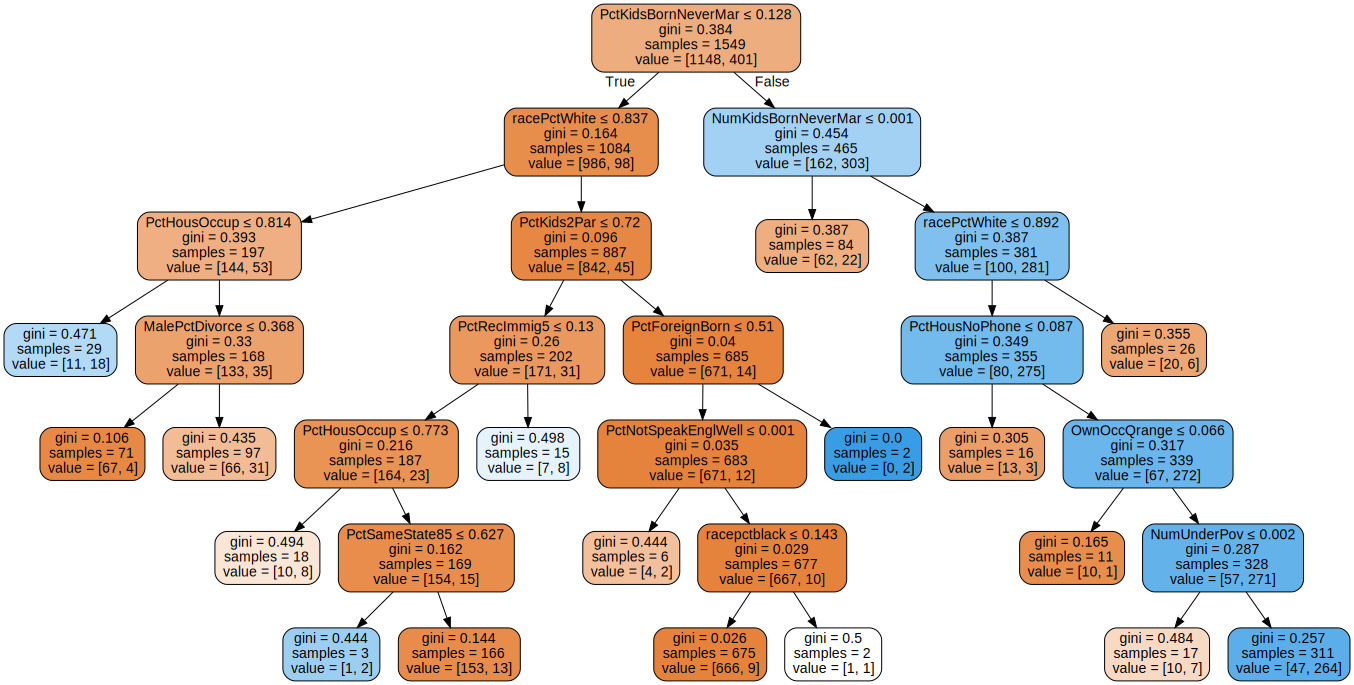

In [13]:
# Get the tree
import graphviz
import pandas as pd

features = []
df = pd.DataFrame(x_train)
for i in df[1:]:
    features.append(str(i))
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=features, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

**Max Features**

In [14]:
scores ={}
x = list()
y = list()
error = list()

features = []
df = pd.DataFrame(x_train)
for i in df[1:]:
    features.append(str(i))

max_features = len(features)

for i in range(1, max_features): #first create a for loop for each max depth
    value_of_j = [] #this will take the average score for each value of k

    for j in range(2,10): #create a for loop for each kfold
        kf =KFold(n_splits=j, shuffle=True, random_state=42)
        score = cross_val_score(tree.DecisionTreeClassifier(criterion='gini', splitter = 'best', max_depth=3, min_samples_split = 0.1, max_features=i), x_train, y_train, cv= kf, scoring="accuracy")
        value_of_j.append(score.mean())

    res = {str(i): value_of_j}
    scores.update(res) # for each max_depth, the average k_fold score

get_min_sample_split = scores

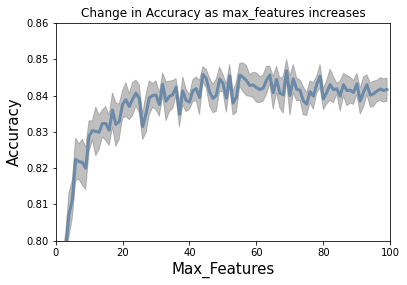

In [15]:
import numpy as np
import statistics 
x =[]
y =[]
error = []
for key, value in get_min_sample_split.items():
    x.append(key)
    y.append(sum(value)/len(value))
    error.append(statistics.stdev(value))
    
x = [round(float(i),2) for i in x]

y_above = []
y_below = []
for i in range(len(error)):
    y_above.append(y[i]+(error[i]*0.5))
    y_below.append(y[i]-(error[i]*0.5))
    
# plt.plot(x, error, 'or')
plt.plot(x, y, color=(0.2, 0.4, 0.6, 0.6), lw=3)
#plt.errorbar(x, y, yerr = error, barsabove = False, fmt='o', capsize=3, color='red')

#plt.fill_between(range(100), y-y_diff, y+y_diff, alpha=0.5)
#plt.errorbar(x, y, yerr = error, ls='-.', fmt='o', capsize=3)
plt.xlabel('Max_Features', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Change in Accuracy as max_features increases')
plt.ylim(0.8, 0.86)
plt.xlim(0,100)#plot the outputs

z1 = np.array(y_above)
z2 = np.array(y_below)

plt.fill_between(x,y_above,y_below,where=z1>=z2,color='grey',alpha=0.5, interpolate=True)


In [19]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

kf =KFold(n_splits=4, shuffle=True, random_state=42)
score = cross_val_score(tree.DecisionTreeClassifier(criterion='gini', splitter = 'best', max_depth=9, min_samples_split = 0.6, ccp_alpha = 0.012, max_features = 70), x_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.84278351 0.79586563 0.81136951 0.8372093 ]
Average score: 0.82


**CCP Alpha**

In [20]:
from sklearn.metrics import roc_curve, auc

scores ={}
x = list()
y = list()
error = list()

ccp_alpha_vals = np.arange(0,0.3,0.001)


for i in ccp_alpha_vals: #first create a for loop for each max depth
    value_of_j = [] #this will take the average score for each value of k

    for j in range(2,10): #create a for loop for each kfold
        kf =KFold(n_splits=j, shuffle=True, random_state=42)
        score = cross_val_score(tree.DecisionTreeClassifier(criterion='gini',splitter = 'best', max_depth=3, min_samples_split = 0.1, max_features=100, ccp_alpha=i), x_train, y_train, cv= kf, scoring="accuracy")
        value_of_j.append(score.mean())

    res = {str(i): value_of_j}
    scores.update(res) # for each max_depth, the average k_fold score

get_min_sample_split = scores

(0.0, 0.15)

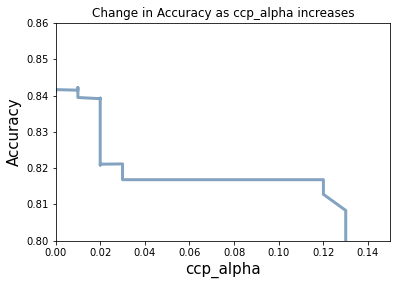

In [21]:
import numpy as np
import statistics 
x =[]
y =[]
error = []
for key, value in get_min_sample_split.items():
    x.append(key)
    y.append(sum(value)/len(value))
    error.append(statistics.stdev(value))
    
x = [round(float(i),2) for i in x]
    
# plt.plot(x, error, 'or')
plt.plot(x, y, color=(0.2, 0.4, 0.6, 0.6), lw=3)
#plt.errorbar(x, y, yerr = error, barsabove = False, fmt='o', capsize=3, color='red')
#plt.errorbar(x, y, yerr = error, ls='-.', fmt='o', capsize=3)
plt.xlabel('ccp_alpha', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Change in Accuracy as ccp_alpha increases')
plt.ylim(0.8, 0.86)
plt.xlim(0,0.15)#plot the outputs


**K-Fold Classification** 
This will increase the number of times the test and train data is split, then will average out the accuracy scores. The cells below will increase the number of K up to 12, then plot the accuracy for the data.

(0.75, 0.925)

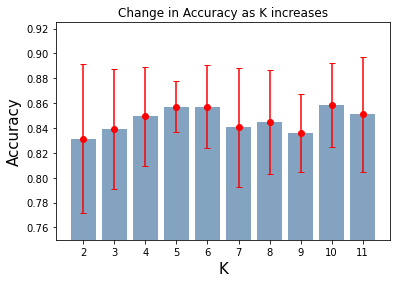

In [24]:
kfold_scores = {}
for i in range(2, 12):
    kf =KFold(n_splits=i, shuffle=True, random_state=42)
    score = cross_val_score(tree.DecisionTreeClassifier(criterion='gini', splitter = 'best', max_depth=3, min_samples_split = 0.1, max_features=100, ccp_alpha=0.01), x_test, y_test, cv= kf, scoring="accuracy")
    res = {str(i):list(score)}
    kfold_scores.update(res)
    
import numpy as np
import statistics 
x =[]
y =[]
error = []
for key, value in kfold_scores.items():
    x.append(key)
    y.append(sum(value)/len(value))
    error.append(statistics.stdev(value))
    
xfit = np.linspace(0, 10, 1000)
# plt.plot(x, error, 'or')
plt.bar(x, y, color=(0.2, 0.4, 0.6, 0.6))
plt.errorbar(x, y, yerr = error, barsabove = False, fmt='o', capsize=3, color='red')
#plt.errorbar(x, y, yerr = error, ls='-.', fmt='o', capsize=3)
plt.xlabel('K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Change in Accuracy as K increases')
plt.ylim(0.75, 0.925)

In [27]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(tree.DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split = 0.1, max_features=70, ccp_alpha=0.01, splitter = 'best'), x_test, y_test, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.86466165 0.85714286 0.87969925 0.85714286 0.84210526]
Average score: 0.86


**Final Confusion Matrix on both test and train data!**

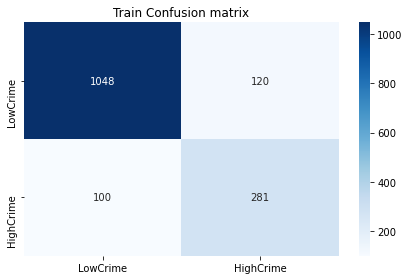

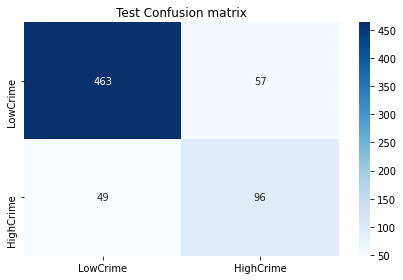

In [31]:
dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split = 0.1, max_features=100, ccp_alpha=0.01, splitter = 'best')
dt.fit(x_train, y_train)
y_train_predict = dt.predict(x_train)
y_test_predict = dt.predict(x_test)

# Set classes based on classification complexity decided in pre-processing
classes = {'LowCrime': 0, 'HighCrime': 1}

# Plot confusion matrix
def plot_confusionmatrix(train_p, train, dom):
    cf = confusion_matrix(train_p,train)
    sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='Blues', fmt='g')
    plt.title(f'{dom} Confusion matrix')
    plt.tight_layout()
    # plt.savefig(f'{dom} Confusion matrix.png')
    plt.show()
    
plot_confusionmatrix(y_train_predict,y_train,dom='Train')
plot_confusionmatrix(y_test_predict,y_test,dom='Test')

**Final Decision Tree**

In [37]:
# Get the tree
import graphviz
import pandas as pd

features = []
df = pd.DataFrame(x_train)
for i in df[1:]:
    features.append(str(i))
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=features, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render(filename='DecisionTree')



'DecisionTree.png'